<a href="https://colab.research.google.com/github/mjiii25/posco-academy/blob/main/Big-Data/Assignment-1/modeling-DT-GB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/mydrive')

Mounted at /content/mydrive


In [121]:
import pandas as pd
import numpy as np

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor, export_graphviz
import graphviz
from sklearn.ensemble import GradientBoostingRegressor

### **데이터 구성하기**

In [3]:
df_raw = pd.read_excel('/content/mydrive/MyDrive/1. 실습데이터 설명(Data Dictionary).xlsx',
                       sheet_name = 'AIR_POLLUTION')

print(df_raw.shape)
df_raw.head(10)

(366, 15)


,MeasDate,PM10,PM25,O3,NO2,CO,SO2,TEMP,RAIN,WIND,WIND_DIR,HUMIDITY,ATM_PRESS,SNOW,CLOUD
0,2019-07-01,29.0,20.0,0.054,0.021,0.5,0.003,24.034783,0.00,2.304348,249.130435,63.173913,995.073913,0.0,5.695652
1,2019-07-02,26.0,19.0,0.053,0.020,0.5,0.003,24.287500,0.00,2.258333,264.583333,63.166667,998.600000,0.0,3.833333
2,2019-07-03,30.0,20.0,0.042,0.023,0.4,0.003,24.175000,0.00,1.791667,280.000000,65.333333,998.270833,0.0,6.291667
3,2019-07-04,28.0,17.0,0.034,0.026,0.4,0.003,25.354167,0.00,2.037500,262.500000,58.625000,996.633333,0.0,2.541667
4,2019-07-05,29.0,19.0,0.045,0.035,0.5,0.003,27.295833,0.00,1.454167,175.416667,45.541667,993.537500,0.0,3.916667
5,2019-07-06,29.0,21.0,0.043,0.032,0.5,0.003,29.866667,0.00,1.541667,80.000000,39.708333,993.691667,0.0,3.500000
6,2019-07-07,16.0,12.0,0.043,0.014,0.3,0.002,26.858333,0.00,2.266667,82.916667,43.541667,997.450000,0.0,6.583333
7,2019-07-08,10.0,6.0,0.035,0.019,0.3,0.002,25.125000,0.00,1.962500,75.833333,45.333333,997.941667,0.0,6.583333
8,2019-07-09,10.0,6.0,0.033,0.019,0.4,0.002,25.112500,0.00,1.837500,81.250000,46.250000,996.712500,0.0,4.416667
9,2019-07-10,9.0,6.0,0.027,0.019,0.3,0.002,22.787500,0.82,2.125000,80.000000,61.000000,997.329167,0.0,8.291667


In [4]:
df_raw.drop('PM25', axis = 1, inplace = True)

In [5]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   MeasDate   366 non-null    datetime64[ns]
 1   PM10       365 non-null    float64       
 2   O3         365 non-null    float64       
 3   NO2        365 non-null    float64       
 4   CO         311 non-null    float64       
 5   SO2        365 non-null    float64       
 6   TEMP       366 non-null    float64       
 7   RAIN       366 non-null    float64       
 8   WIND       366 non-null    float64       
 9   WIND_DIR   366 non-null    float64       
 10  HUMIDITY   366 non-null    float64       
 11  ATM_PRESS  366 non-null    float64       
 12  SNOW       366 non-null    float64       
 13  CLOUD      366 non-null    float64       
dtypes: datetime64[ns](1), float64(13)
memory usage: 40.2 KB


In [6]:
df_raw.describe().round(3)

,PM10,O3,NO2,CO,SO2,TEMP,RAIN,WIND,WIND_DIR,HUMIDITY,ATM_PRESS,SNOW,CLOUD
count,365.000,365.000,365.000,311.000,365.000,366.000,366.000,366.000,366.000,366.000,366.000,366.000,366.000
mean,33.422,0.024,0.027,0.517,0.003,13.863,0.382,2.225,209.420,60.292,1005.846,0.023,5.063
std,15.938,0.012,0.010,0.153,0.001,9.830,1.122,0.723,70.753,14.533,8.125,0.222,2.986
min,5.000,0.002,0.008,0.300,0.002,-7.954,0.000,0.942,50.000,17.875,983.800,0.000,0.000
25%,22.000,0.014,0.019,0.400,0.003,5.493,0.000,1.722,160.000,49.677,999.423,0.000,2.510
50%,31.000,0.023,0.025,0.500,0.003,13.996,0.000,2.094,221.042,61.062,1006.408,0.000,5.312
75%,42.000,0.032,0.034,0.600,0.003,23.073,0.115,2.620,265.833,69.917,1011.571,0.000,7.573
max,101.000,0.062,0.059,1.000,0.005,31.721,11.800,5.883,351.250,94.958,1025.529,3.188,10.000


**결측값 확인하기**

In [7]:
df_raw.isnull().sum()

MeasDate      0
PM10          1
O3            1
NO2           1
CO           55
SO2           1
TEMP          0
RAIN          0
WIND          0
WIND_DIR      0
HUMIDITY      0
ATM_PRESS     0
SNOW          0
CLOUD         0
dtype: int64

In [8]:
df_raw.fillna(df_raw.median(), inplace = True)

df_raw.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  """Entry point for launching an IPython kernel.


,MeasDate,PM10,O3,NO2,CO,SO2,TEMP,RAIN,WIND,WIND_DIR,HUMIDITY,ATM_PRESS,SNOW,CLOUD
0,2019-07-01,29.0,0.054,0.021,0.5,0.003,24.034783,0.0,2.304348,249.130435,63.173913,995.073913,0.0,5.695652
1,2019-07-02,26.0,0.053,0.020,0.5,0.003,24.287500,0.0,2.258333,264.583333,63.166667,998.600000,0.0,3.833333
2,2019-07-03,30.0,0.042,0.023,0.4,0.003,24.175000,0.0,1.791667,280.000000,65.333333,998.270833,0.0,6.291667
3,2019-07-04,28.0,0.034,0.026,0.4,0.003,25.354167,0.0,2.037500,262.500000,58.625000,996.633333,0.0,2.541667
4,2019-07-05,29.0,0.045,0.035,0.5,0.003,27.295833,0.0,1.454167,175.416667,45.541667,993.537500,0.0,3.916667


In [9]:
df_raw.isnull().sum()

MeasDate     0
PM10         0
O3           0
NO2          0
CO           0
SO2          0
TEMP         0
RAIN         0
WIND         0
WIND_DIR     0
HUMIDITY     0
ATM_PRESS    0
SNOW         0
CLOUD        0
dtype: int64

**설명변수와 목표변수 분리하기**

In [10]:
df_raw_x = df_raw.drop(['MeasDate', 'PM10'], axis = 1, inplace = False)
df_raw_y = df_raw['PM10']

In [11]:
print(df_raw_x.shape)
df_raw_x.head()

(366, 12)


,O3,NO2,CO,SO2,TEMP,RAIN,WIND,WIND_DIR,HUMIDITY,ATM_PRESS,SNOW,CLOUD
0,0.054,0.021,0.5,0.003,24.034783,0.0,2.304348,249.130435,63.173913,995.073913,0.0,5.695652
1,0.053,0.020,0.5,0.003,24.287500,0.0,2.258333,264.583333,63.166667,998.600000,0.0,3.833333
2,0.042,0.023,0.4,0.003,24.175000,0.0,1.791667,280.000000,65.333333,998.270833,0.0,6.291667
3,0.034,0.026,0.4,0.003,25.354167,0.0,2.037500,262.500000,58.625000,996.633333,0.0,2.541667
4,0.045,0.035,0.5,0.003,27.295833,0.0,1.454167,175.416667,45.541667,993.537500,0.0,3.916667


In [12]:
print(df_raw_y.shape)
df_raw_y.head()

(366,)


0    29.0
1    26.0
2    30.0
3    28.0
4    29.0
Name: PM10, dtype: float64

### **Vital few로 선정한 설명변수 구성하기**

In [66]:
df_raw_x_vf = df_raw_x[['O3', 'NO2', 'CO', 'SO2','TEMP', 'CLOUD']]

print(df_raw_x_vf.shape)
df_raw_x_vf.head()

(366, 6)


,O3,NO2,CO,SO2,TEMP,CLOUD
0,0.054,0.021,0.5,0.003,24.034783,5.695652
1,0.053,0.020,0.5,0.003,24.287500,3.833333
2,0.042,0.023,0.4,0.003,24.175000,6.291667
3,0.034,0.026,0.4,0.003,25.354167,2.541667
4,0.045,0.035,0.5,0.003,27.295833,3.916667


In [67]:
df_train_x_vf, df_test_x_vf, df_train_y_vf, df_test_y_vf = train_test_split(df_raw_x_vf,
                                                                            df_raw_y,
                                                                            test_size = 0.3)

In [68]:
print(df_train_x_vf.shape)
df_train_x_vf.head()

(256, 6)


,O3,NO2,CO,SO2,TEMP,CLOUD
138,0.004,0.045,0.8,0.003,6.858333,5.458333
47,0.061,0.016,0.5,0.003,26.025000,5.333333
216,0.020,0.029,0.8,0.004,1.475000,5.875000
25,0.021,0.027,0.5,0.002,25.058333,9.875000
253,0.023,0.021,0.6,0.003,7.054167,8.291667


In [69]:
print(df_train_y_vf.shape)
df_train_y_vf.head()

(256,)


138    33.0
47     29.0
216    68.0
25     22.0
253    38.0
Name: PM10, dtype: float64

In [70]:
print(df_test_x_vf.shape)
df_test_x_vf.head()

(110, 6)


,O3,NO2,CO,SO2,TEMP,CLOUD
178,0.014,0.030,0.6,0.003,2.475000,7.208333
81,0.014,0.029,0.4,0.003,19.383333,8.708333
363,0.044,0.009,0.4,0.003,25.033333,2.625000
236,0.031,0.015,0.6,0.003,4.500000,6.583333
248,0.028,0.019,0.5,0.003,1.095833,0.000000


In [71]:
print(df_test_y_vf.shape)
df_test_y_vf.head()

(110,)


178    46.0
81     22.0
363    27.0
236    68.0
248    34.0
Name: PM10, dtype: float64

### **Vital Few를 이용하여 의사결정나무(Decision Tree) 모델링하기**

In [72]:
dt_regressor = DecisionTreeRegressor()
dt_regressor.fit(df_train_x_vf, df_train_y_vf)

print('Model Score on train set : {:.3f}'.format(dt_regressor.score(df_train_x_vf, df_train_y_vf)))
print('Model Score on test set : {:.3f}'.format(dt_regressor.score(df_test_x_vf, df_test_y_vf)))

Model Score on train set : 1.000
Model Score on test set : -0.202


#### **모델 파라미터 설정하기 : min_samples_leaf**

In [97]:
train_score = []; test_score = []
para_leaf = [n_leaf * 2 for n_leaf in range(1,20)]

for v_min_samples in para_leaf :
    dt = DecisionTreeRegressor(min_samples_leaf = v_min_samples)
    dt.fit(df_train_x_vf, df_train_y_vf)
    train_score.append(dt.score(df_train_x_vf, df_train_y_vf))
    test_score.append(dt.score(df_test_x_vf, df_test_y_vf))

df_score_leaf = pd.DataFrame()
df_score_leaf['MinSamplesLeaf'] = para_leaf
df_score_leaf['TrainScore'] = train_score
df_score_leaf['TestScore'] = test_score

In [98]:
df_score_leaf.round(3)

,MinSamplesLeaf,TrainScore,TestScore
0,2,0.938,0.058
1,4,0.816,0.063
2,6,0.740,0.071
3,8,0.706,0.097
4,10,0.671,0.142
5,12,0.614,0.148
6,14,0.600,0.136
7,16,0.594,0.137
8,18,0.592,0.133
9,20,0.560,0.164


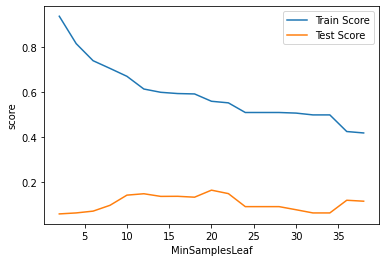

In [100]:
plt.plot(para_leaf, train_score, linestyle = '-', label = 'Train Score')
plt.plot(para_leaf, test_score, linestyle = '-', label = 'Test Score')
plt.ylabel('score'); plt.xlabel('MinSamplesLeaf')
plt.legend()

- 리프 노드의 최소 샘플 수가 증가할수록 train과 test에 대한 모델의 성능이 감소하거나 변화가 거의 없다.
- TrainScore가 0.560, TestScore가 0.164인 **min_samples_leaf = 20**을 선택한다.

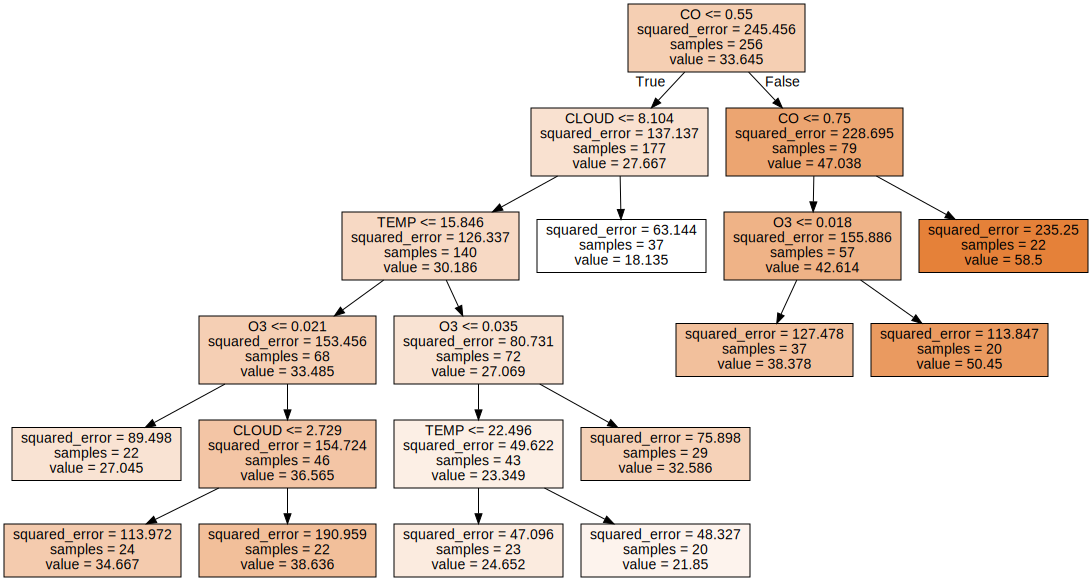

In [103]:
v_feature_name = df_train_x_vf.columns

tree_graph = DecisionTreeRegressor(min_samples_leaf = 20)
tree_graph.fit(df_train_x_vf, df_train_y_vf)
export_graphviz(tree_graph, out_file = 'tree_leaf.dot',
                feature_names = v_feature_name, impurity = True, filled = True)

with open('tree_leaf.dot') as f :
    dot_graph = f.read()
    display(graphviz.Source(dot_graph))

#### **모델 파라미터 설정하기 : min_samples_split**

In [110]:
train_score = []; test_score = []
para_split = [n_split * 2 for n_split in range(1,20)]

for v_min_split in para_split :
    dt = DecisionTreeRegressor(min_samples_leaf = 20,
                               min_samples_split = v_min_split)
    dt.fit(df_train_x_vf, df_train_y_vf)
    train_score.append(dt.score(df_train_x_vf, df_train_y_vf))
    test_score.append(dt.score(df_test_x_vf, df_test_y_vf))

df_score_split = pd.DataFrame()
df_score_split['MinSamplesSplit'] = para_split
df_score_split['TrainScore'] = train_score
df_score_split['TestScore'] = test_score

In [111]:
df_score_split.round(3)

,MinSamplesSplit,TrainScore,TestScore
0,2,0.56,0.164
1,4,0.56,0.164
2,6,0.56,0.164
3,8,0.56,0.164
4,10,0.56,0.164
5,12,0.56,0.164
6,14,0.56,0.164
7,16,0.56,0.164
8,18,0.56,0.164
9,20,0.56,0.164


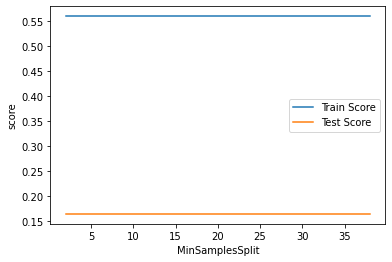

In [112]:
plt.plot(para_split, train_score, linestyle = '-', label = 'Train Score')
plt.plot(para_split, test_score, linestyle = '-', label = 'Test Score')
plt.ylabel('score'); plt.xlabel('MinSamplesSplit')
plt.legend()

- 분리 노드의 최소 샘플 수에 변화가 생겨도 train과 test 데이터에 대한 모델의 성능에는 변화가 없다.
- 모델을 구체화시키기 위해 **min_samples_split = 10**으로 설정한다.

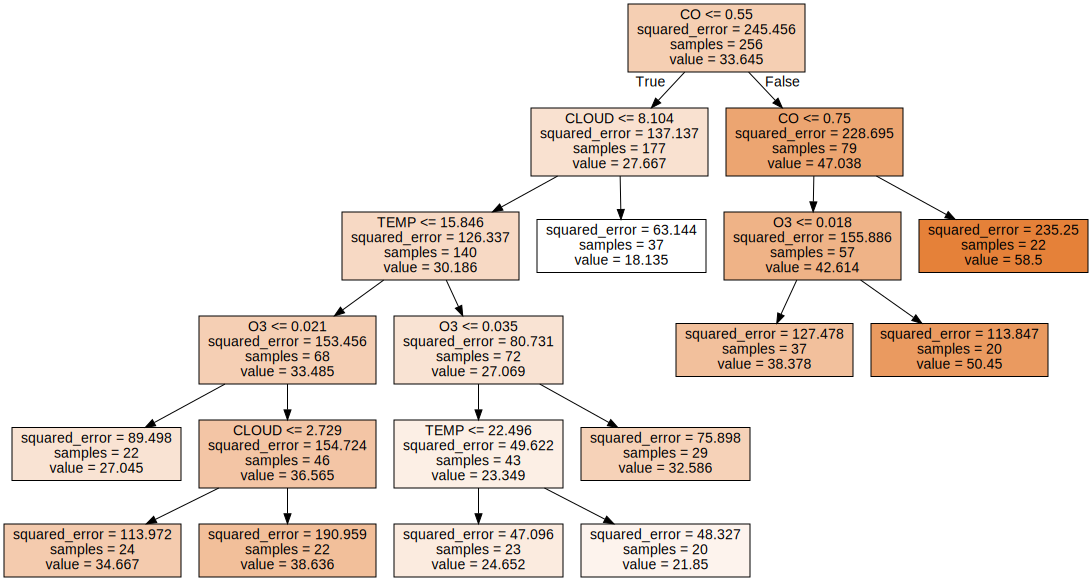

In [113]:
v_feature_name = df_train_x_vf.columns

tree_graph = DecisionTreeRegressor(min_samples_leaf = 20,
                                   min_samples_split = 10)
tree_graph.fit(df_train_x_vf, df_train_y_vf)
export_graphviz(tree_graph, out_file = 'tree_leaf.dot',
                feature_names = v_feature_name, impurity = True, filled = True)

with open('tree_leaf.dot') as f :
    dot_graph = f.read()
    display(graphviz.Source(dot_graph))

#### **모델 파라미터 설정하기 :max_depth**

In [114]:
train_score = []; test_score = []
para_depth = [depth for depth in range(1,10)]

for v_depth in para_depth :
    dt = DecisionTreeRegressor(min_samples_leaf = 20,
                               min_samples_split = 10,
                               max_depth = v_depth)
    dt.fit(df_train_x_vf, df_train_y_vf)
    train_score.append(dt.score(df_train_x_vf, df_train_y_vf))
    test_score.append(dt.score(df_test_x_vf, df_test_y_vf))

df_score_depth = pd.DataFrame()
df_score_depth['MaxDepth'] = para_depth
df_score_depth['TrainScore'] = train_score
df_score_depth['TestScore'] = test_score

In [115]:
df_score_depth.round(3)

,MaxDepth,TrainScore,TestScore
0,1,0.326,0.140
1,2,0.458,0.104
2,3,0.511,0.138
3,4,0.556,0.152
4,5,0.560,0.164
5,6,0.560,0.164
6,7,0.560,0.164
7,8,0.560,0.164
8,9,0.560,0.164


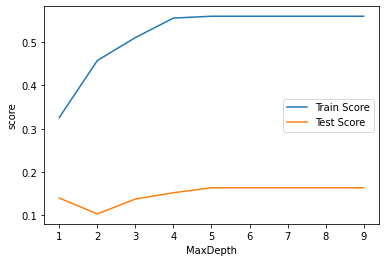

In [116]:
plt.plot(para_depth, train_score, linestyle = '-', label = 'Train Score')
plt.plot(para_depth, test_score, linestyle = '-', label = 'Test Score')
plt.ylabel('score'); plt.xlabel('MaxDepth')
plt.legend()

- 나무의 최대 깊이가 커질수록 train과 test 데이터에 대한 모델의 성능이 증가하고 감소하다가, 4를 넘어서면서 모델 성능에 변화가 생기지 않는다.
- 모델의 과대적합을 막기 위해 **max_depth = 5**로 설정한다.

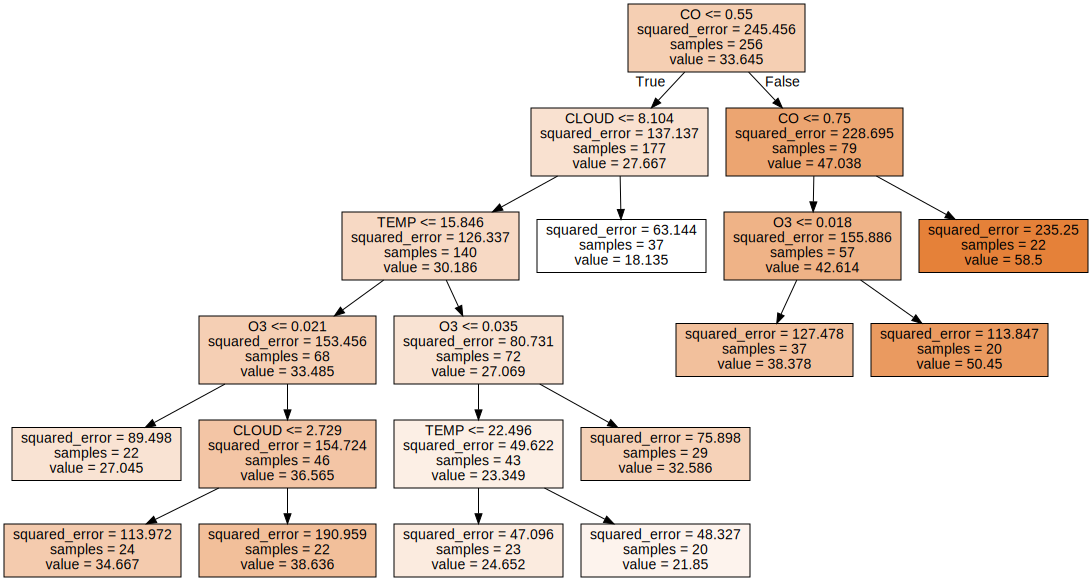

In [120]:
v_feature_name = df_train_x_vf.columns

tree_graph = DecisionTreeRegressor(min_samples_leaf = 20,
                                   min_samples_split = 5,
                                   max_depth = 10)
tree_graph.fit(df_train_x_vf, df_train_y_vf)
export_graphviz(tree_graph, out_file = 'tree_leaf.dot',
                feature_names = v_feature_name, impurity = True, filled = True)

with open('tree_leaf.dot') as f :
    dot_graph = f.read()
    display(graphviz.Source(dot_graph))

### **의사결정나무의 최종 모델 생성하기 및 평가하기**

In [153]:
dt_final = DecisionTreeRegressor(min_samples_leaf = 20,
                                 min_samples_split = 10,
                                 max_depth = 5)
dt_final.fit(df_train_x_vf, df_train_y_vf)

print('Score on training set : {:.3f}'.format(dt_final.score(df_train_x_vf, df_train_y_vf)))
print('Score on test set : {:.3f}'.format(dt_final.score(df_test_x_vf, df_test_y_vf)))

Score on training set : 0.560
Score on test set : 0.164


- 의사결정나무로 이끌어낸 모델의 성능은 train과 test 데이터에 대해 각각 56%, 16.4%이다.
- Train 데이터에 대해 모델의 과대적합이 발생한 것으로 보이며, 전체적인 모델의 성능 또한 좋지 않다는 결론을 내릴 수 있다.

### **Vital Few를 이용하여 그래디언트 부스팅(Gradient Boosting) 모델링하기**

#### **모델 파라미터 설정하기 : n_estimators**

In [125]:
train_score = []; test_score = []
para_n_tree = [n_tree * 20 for n_tree in range(1,11)]

for v_n_estimators in para_n_tree :
    gb = GradientBoostingRegressor(n_estimators = v_n_estimators)
    gb.fit(df_train_x_vf, df_train_y_vf)
    train_score.append(gb.score(df_train_x_vf, df_train_y_vf))
    test_score.append(gb.score(df_test_x_vf, df_test_y_vf))

df_score_n_tree = pd.DataFrame()
df_score_n_tree['n_estimators'] = para_n_tree
df_score_n_tree['TrainScore'] = train_score
df_score_n_tree['TestScore'] = test_score

In [126]:
df_score_n_tree.round(3)

,n_estimators,TrainScore,TestScore
0,20,0.715,0.238
1,40,0.809,0.254
2,60,0.861,0.268
3,80,0.892,0.279
4,100,0.914,0.287
5,120,0.928,0.290
6,140,0.941,0.294
7,160,0.950,0.296
8,180,0.958,0.296
9,200,0.966,0.303


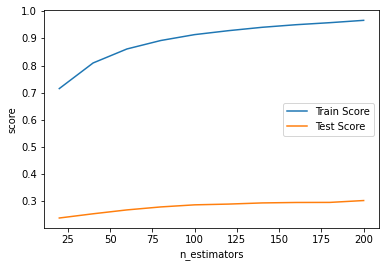

In [127]:
plt.plot(para_n_tree, train_score, linestyle = '-', label = 'Train Score')
plt.plot(para_n_tree, test_score, linestyle = '-', label = 'Test Score')
plt.ylabel('score'); plt.xlabel('n_estimators')
plt.legend()

- 나무의 개수가 늘어날수록 train과 test 데이터에 대한 모델의 성능이 모두 향상된다.
- 모델의 성능을 최대로 끌어올리기 위해 **n_estimators = 200**으로 설정한다.

#### **모델 파라미터 설정하기 : min_samples_leaf**

In [138]:
train_score = []; test_score = []
para_leaf = [n_leaf for n_leaf in range(1,21)]

for v_min_leaf in para_leaf :
    gb = GradientBoostingRegressor(n_estimators = 200,
                                   min_samples_leaf = v_min_leaf)
    gb.fit(df_train_x_vf, df_train_y_vf)
    train_score.append(gb.score(df_train_x_vf, df_train_y_vf))
    test_score.append(gb.score(df_test_x_vf, df_test_y_vf))

df_score_leaf = pd.DataFrame()
df_score_leaf['MinSamplesLeaf'] = para_leaf
df_score_leaf['TrainScore'] = train_score
df_score_leaf['TestScore'] = test_score

In [139]:
df_score_leaf.round(3)

,MinSamplesLeaf,TrainScore,TestScore
0,1,0.966,0.296
1,2,0.951,0.329
2,3,0.961,0.336
3,4,0.954,0.308
4,5,0.946,0.336
5,6,0.942,0.320
6,7,0.932,0.318
7,8,0.924,0.328
8,9,0.920,0.348
9,10,0.915,0.320


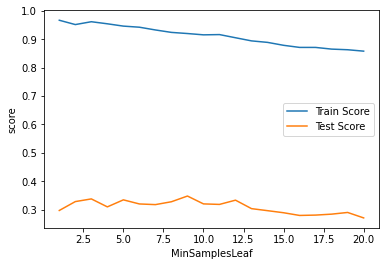

In [130]:
plt.plot(para_leaf, train_score, linestyle = '-', label = 'Train Score')
plt.plot(para_leaf, test_score, linestyle = '-', label = 'Test Score')
plt.ylabel('score'); plt.xlabel('MinSamplesLeaf')
plt.legend()

- 리프 노드의 최소 샘플 수가 증가할수록 train과 test 데이터에 대한 모델의 성능이 감소한다.
- TrainScore가 0.920, TestScore가 0.348인 **min_samples_leaf = 9**를 선택한다.

#### **모델 파라미터 설정하기 : min_samples_split**

In [136]:
train_score = []; test_score = []
para_split = [n_split * 3 for n_split in range(1,21)]

for v_min_split in para_split :
    gb = GradientBoostingRegressor(n_estimators = 200,
                                   min_samples_leaf = 9,
                                   min_samples_split = v_min_leaf)
    gb.fit(df_train_x_vf, df_train_y_vf)
    train_score.append(gb.score(df_train_x_vf, df_train_y_vf))
    test_score.append(gb.score(df_test_x_vf, df_test_y_vf))

df_score_split = pd.DataFrame()
df_score_split['MinSamplesSplit'] = para_split
df_score_split['TrainScore'] = train_score
df_score_split['TestScore'] = test_score

In [137]:
df_score_split.round(3)

,MinSamplesSplit,TrainScore,TestScore
0,3,0.915,0.344
1,6,0.915,0.344
2,9,0.915,0.344
3,12,0.915,0.344
4,15,0.915,0.344
5,18,0.915,0.344
6,21,0.915,0.344
7,24,0.915,0.344
8,27,0.915,0.344
9,30,0.915,0.344


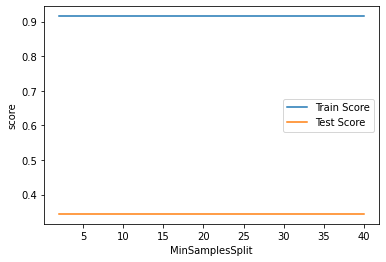

In [133]:
plt.plot(para_split, train_score, linestyle = '-', label = 'Train Score')
plt.plot(para_split, test_score, linestyle = '-', label = 'Test Score')
plt.ylabel('score'); plt.xlabel('MinSamplesSplit')
plt.legend()

- 분리 노드의 최소 샘플 수가 증가하여도 모델의 성능에 변화가 없다.
- 해당 하이퍼파라미터는 포함시키지 않는 것으로 결정한다.

#### **모델 파라미터 설정하기 : max_depth**

In [140]:
train_score = []; test_score = []
para_depth = [depth for depth in range(1,11)]

for v_depth in para_depth :
    gb = GradientBoostingRegressor(n_estimators = 200,
                                   min_samples_leaf = 9,
                                   max_depth = v_depth)
    gb.fit(df_train_x_vf, df_train_y_vf)
    train_score.append(gb.score(df_train_x_vf, df_train_y_vf))
    test_score.append(gb.score(df_test_x_vf, df_test_y_vf))

df_score_depth = pd.DataFrame()
df_score_depth['MaxDepth'] = para_depth
df_score_depth['TrainScore'] = train_score
df_score_depth['TestScore'] = test_score

In [141]:
df_score_depth.round(3)

,MaxDepth,TrainScore,TestScore
0,1,0.645,0.242
1,2,0.831,0.327
2,3,0.920,0.348
3,4,0.956,0.342
4,5,0.974,0.348
5,6,0.983,0.319
6,7,0.988,0.322
7,8,0.992,0.345
8,9,0.994,0.321
9,10,0.996,0.292


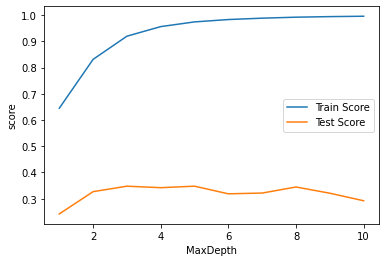

In [142]:
plt.plot(para_depth, train_score, linestyle = '-', label = 'Train Score')
plt.plot(para_depth, test_score, linestyle = '-', label = 'Test Score')
plt.ylabel('score'); plt.xlabel('MaxDepth')
plt.legend()

- 모델의 최대 깊이가 커질수록 train 데이터에 대한 과대적합 현상이 심해질 뿐, test 데이터에 대한 모델의 성능은 크게 변하지 않는다.
- 모델의 일반화 가능성을 최대화하기 위해 **max_depth = 5**로 설정한다.

#### **모델 파라미터 설정하기 : learning_rate**

In [149]:
train_score = []; test_score = []
para_lr = [lr * 0.01 for lr in range(1,21)]

for v_learning_rate in para_lr :
    gb = GradientBoostingRegressor(n_estimators = 200,
                                   min_samples_leaf = 9,
                                   max_depth = 5,
                                   learning_rate = v_learning_rate)
    gb.fit(df_train_x_vf, df_train_y_vf)
    train_score.append(gb.score(df_train_x_vf, df_train_y_vf))
    test_score.append(gb.score(df_test_x_vf, df_test_y_vf))

df_score_lr = pd.DataFrame()
df_score_lr['LearningRate'] = para_lr
df_score_lr['TrainScore'] = train_score
df_score_lr['TestScore'] = test_score

In [150]:
df_score_lr.round(3)

,LearningRate,TrainScore,TestScore
0,0.01,0.773,0.301
1,0.02,0.861,0.299
2,0.03,0.901,0.319
3,0.04,0.920,0.312
4,0.05,0.941,0.323
5,0.06,0.951,0.321
6,0.07,0.962,0.322
7,0.08,0.963,0.329
8,0.09,0.972,0.340
9,0.10,0.974,0.348


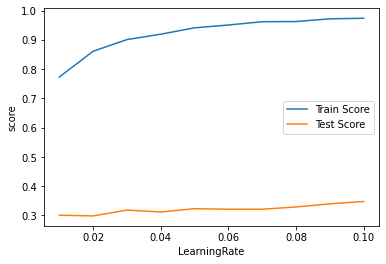

In [148]:
plt.plot(para_lr, train_score, linestyle = '-', label = 'Train Score')
plt.plot(para_lr, test_score, linestyle = '-', label = 'Test Score')
plt.ylabel('score'); plt.xlabel('LearningRate')
plt.legend()

- 학습률이 높아질수록 train과 test 데이터에 대한 모델의 성능이 증가한다.
- 과대적합의 우려의 있기 때문에 **learning_rate = 0.10**으로 설정한다.

### **그래디언트 부스팅의 최종 모델 생성하기 및 평가하기**

In [152]:
gb_final = GradientBoostingRegressor(n_estimators = 200,
                                     min_samples_leaf = 9,
                                     max_depth = 5,
                                     learning_rate = 0.1)
gb_final.fit(df_train_x_vf, df_train_y_vf)

print('Score on training set : {:.3f}'.format(gb_final.score(df_train_x_vf, df_train_y_vf)))
print('Score on test set : {:.3f}'.format(gb_final.score(df_test_x_vf, df_test_y_vf)))

Score on training set : 0.974
Score on test set : 0.348


- 그래디언트 부스팅으로 이끌어낸 모델의 성능은 train과 test 데이터에 대해 각각 97.4%, 34.8%이다.
- Train 데이터에 대해 모델이 여전히 과대적합되어 있는 것으로 보인다.